<a href="https://colab.research.google.com/github/ThallesRodriguess/Censo-sobre-esquilos-do-Central-Park-em-2018/blob/main/2018_Central_Park_Squirrel_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Censo sobre esquilos do Central Park em 2018

O objetivo deste notebook é comparar as quantidades de esquilos que habitam o Central Park de Nova York do mês de Outubro de 2018, de acordo com suas cores, faixa etária, hábitos e aparição conforme horário do dia.


Neste notebook, foi utilizada as seguintes bibliotecas:

*  Pandas: para realizar o carregamento dos dados via csv.
*  Matplotlib: para fazer a plotação dos gráficos de acordo com os dados do csv carregados com o Pandas.
*  Seaborn: para fazer análise exploratória de dados com ferramentas de plotagem.

# Importando bibliotecas e csv

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv")

# Vusualizando o dataframe

In [3]:
df

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904)
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581)
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755)
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466)
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973)
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883)
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912)


# Convertendo o formato da data de mmddyyyy para yyyy-mm-dd

In [4]:
df_date = pd.to_datetime(df['Date'], format='%m%d%Y')

In [5]:
df_date

0      2018-10-14
1      2018-10-06
2      2018-10-10
3      2018-10-18
4      2018-10-18
          ...    
3018   2018-10-07
3019   2018-10-13
3020   2018-10-12
3021   2018-10-10
3022   2018-10-12
Name: Date, Length: 3023, dtype: datetime64[ns]

# Criando uma nova coluna com os novos formatos de data

In [6]:
df['New Date'] = df_date

In [7]:
df['New Date']

0      2018-10-14
1      2018-10-06
2      2018-10-10
3      2018-10-18
4      2018-10-18
          ...    
3018   2018-10-07
3019   2018-10-13
3020   2018-10-12
3021   2018-10-10
3022   2018-10-12
Name: New Date, Length: 3023, dtype: datetime64[ns]

# Contagem de ocorrências de esquilos conforme os dias

In [8]:
df_date = df['New Date'].value_counts()

In [9]:
df_date

2018-10-13    434
2018-10-07    405
2018-10-14    368
2018-10-06    337
2018-10-10    335
2018-10-08    285
2018-10-12    218
2018-10-17    216
2018-10-18    200
2018-10-19    158
2018-10-20     67
Name: New Date, dtype: int64

# Porcentagem da contagem de ocorrências de esquilos conforme os dias

In [10]:
(df_date/(df_date).sum())*100

2018-10-13    14.356599
2018-10-07    13.397287
2018-10-14    12.173338
2018-10-06    11.147866
2018-10-10    11.081707
2018-10-08     9.427721
2018-10-12     7.211379
2018-10-17     7.145220
2018-10-18     6.615944
2018-10-19     5.226596
2018-10-20     2.216341
Name: New Date, dtype: float64

# Todas as colunas do dataframe

In [11]:
df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long', 'New Date'],
      dtype='object')

# As 10 maiores atividades registradas dos esquilos

In [12]:
df_activity = df['Other Activities'].value_counts().head(10)

In [13]:
df_activity

digging         19
sitting         16
walking         14
burying         12
playing         11
jumping          6
grooming         5
nut in mouth     4
cleaning         4
staring          4
Name: Other Activities, dtype: int64

In [14]:
df_activity.index

Index(['digging', 'sitting', 'walking', 'burying', 'playing', 'jumping',
       'grooming', 'nut in mouth', 'cleaning', 'staring'],
      dtype='object')

# Gráfico das 10 maiores atividades registradas dos esquilos

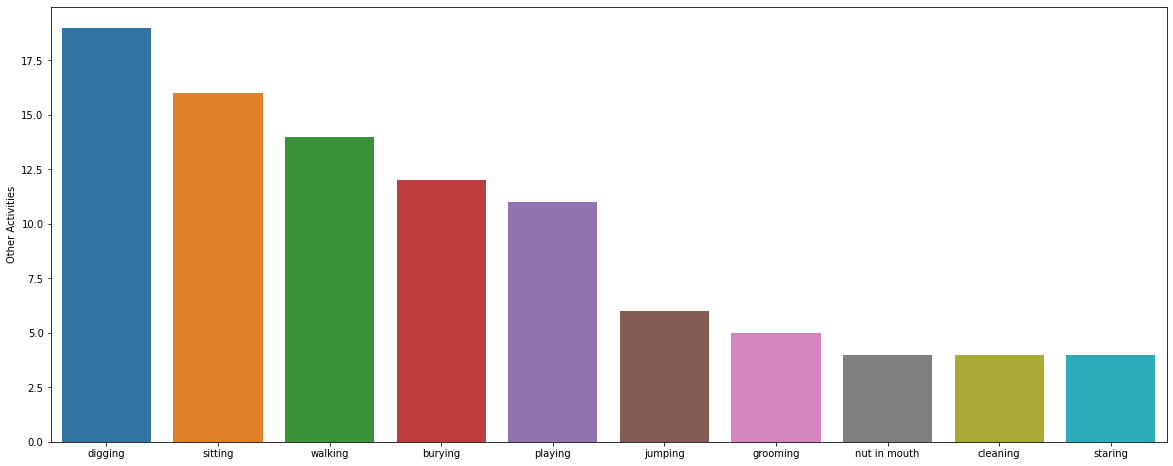

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=df_activity.index, y= df_activity)

# Gráfico em porcentagem das 10 maiores atividades registradas dos esquilos

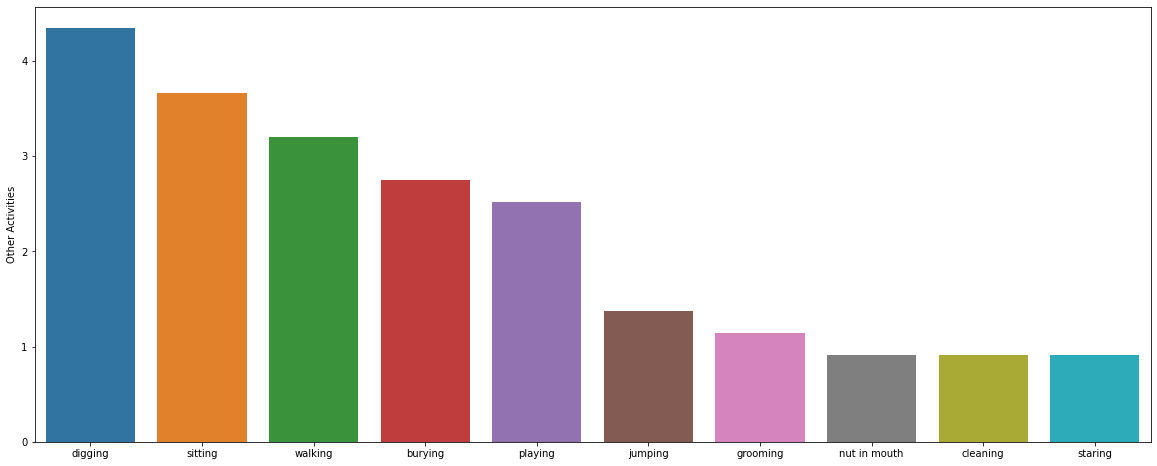

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=df_activity.index, y= df['Other Activities'].value_counts(normalize=True).head(10)*100)

In [17]:
df_activity = df['Other Activities'].value_counts(normalize=True).head(10)*100

In [18]:
df_activity

digging         4.347826
sitting         3.661327
walking         3.203661
burying         2.745995
playing         2.517162
jumping         1.372998
grooming        1.144165
nut in mouth    0.915332
cleaning        0.915332
staring         0.915332
Name: Other Activities, dtype: float64

In [19]:
df['Foraging'].value_counts()

False    1588
True     1435
Name: Foraging, dtype: int64

In [20]:
df['Eating'].value_counts()

False    2263
True      760
Name: Eating, dtype: int64

In [21]:
df['Climbing'].value_counts()

False    2365
True      658
Name: Climbing, dtype: int64

In [22]:
df['Chasing'].value_counts()

False    2744
True      279
Name: Chasing, dtype: int64

In [23]:
df['Running'].value_counts()

False    2293
True      730
Name: Running, dtype: int64

In [24]:
df['Specific Location'].value_counts()

tree                                          43
in tree                                       32
on fence                                       8
Tree                                           7
treed area                                     6
                                              ..
Gathering/digging in grassy area b/w trees     1
hanging upside down to get a nut               1
running on rocks                               1
playing very high in tree w/ #7                1
Across Transverse                              1
Name: Specific Location, Length: 304, dtype: int64

In [25]:
df['Above Ground Sighter Measurement'].value_counts()

FALSE    2116
10        116
20         84
15         71
2          55
3          52
5          51
30         44
4          42
25         33
6          32
1          30
8          30
40         25
7          19
50         19
12         16
13         11
35         10
28          7
18          5
100         5
45          4
9           4
17          3
60          3
14          2
24          2
23          2
65          2
11          2
43          2
16          2
33          1
31          1
80          1
0           1
180         1
55          1
70          1
19          1
Name: Above Ground Sighter Measurement, dtype: int64

In [26]:
df['Color notes'].value_counts()

Gray & Cinnamon selected as Primary. White selected as Highlights. Made executive adjustments.                     9
white belly                                                                                                        5
white back legs                                                                                                    4
Gray & Cinnamon selected as Primary. Nothing selected as Highlights. Made executive adjustments.                   4
White tail                                                                                                         4
                                                                                                                  ..
skinny tail                                                                                                        1
Drawing included on tally sheet                                                                                    1
Black & Cinnamon selected as Primary. White selected as Highligh

In [27]:
df['Combination of Primary and Highlight Color'].value_counts()

Gray+                          895
Gray+Cinnamon                  752
Gray+White                     489
Gray+Cinnamon, White           265
Cinnamon+Gray                  162
Cinnamon+White                  94
Black+                          74
Cinnamon+                       62
Cinnamon+Gray, White            58
+                               55
Gray+Black, Cinnamon, White     32
Gray+Black                      24
Black+Cinnamon                  15
Cinnamon+Black                  10
Gray+Black, Cinnamon             9
Black+Gray                       8
Gray+Black, White                7
Black+Cinnamon, White            3
Cinnamon+Black, White            3
Cinnamon+Gray, Black             3
Black+White                      2
Black+Gray, White                1
Name: Combination of Primary and Highlight Color, dtype: int64

In [28]:
df['Location'].value_counts()

Ground Plane    2116
Above Ground     843
Name: Location, dtype: int64

In [29]:
(df['Kuks']==True).value_counts()

False    2921
True      102
Name: Kuks, dtype: int64

In [30]:
(df['Indifferent']==True).value_counts()

False    1569
True     1454
Name: Indifferent, dtype: int64

# Dataframe informando o total de esquilos dos hectares conforme suas cores primárias por dia

In [31]:
df_info = df.groupby(["New Date", "Primary Fur Color"])[["Hectare Squirrel Number"]].sum().pivot_table(index="New Date", columns="Primary Fur Color")

In [32]:
df_info

Hectare Squirrel Number               
Primary Fur Color                   Black Cinnamon  Gray
New Date                                                
2018-10-06                             67      188  1130
2018-10-07                             40      248  1249
2018-10-08                             18      213  1174
2018-10-10                             15      316  1183
2018-10-12                             29      177   619
2018-10-13                             51      300  1250
2018-10-14                             62       88  1295
2018-10-17                             86       74   715
2018-10-18                             14      146   567
2018-10-19                             26       23   653
2018-10-20                              5       27   196

# Dataframe informando a porcentagem de esquilos dos hectares conforme suas cores primárias pro dia

In [33]:
(df_info/(df_info).sum())*100

Hectare Squirrel Number                      
Primary Fur Color                   Black   Cinnamon       Gray
New Date                                                       
2018-10-06                      16.222760  10.444444  11.265078
2018-10-07                       9.685230  13.777778  12.451401
2018-10-08                       4.358354  11.833333  11.703718
2018-10-10                       3.631961  17.555556  11.793440
2018-10-12                       7.021792   9.833333   6.170870
2018-10-13                      12.348668  16.666667  12.461370
2018-10-14                      15.012107   4.888889  12.909979
2018-10-17                      20.823245   4.111111   7.127903
2018-10-18                       3.389831   8.111111   5.652477
2018-10-19                       6.295400   1.277778   6.509820
2018-10-20                       1.210654   1.500000   1.953943

# Gráfico informando a quantidade de esquilos conforme as cores

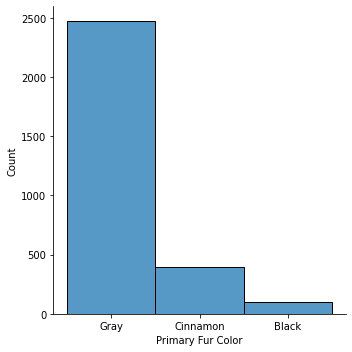

In [34]:
sns.displot(df['Primary Fur Color'])

# Frequência das cores dos esquilos


In [35]:
df_sq_percent = df['Primary Fur Color'].value_counts()

In [36]:
df_sq_percent

Gray        2473
Cinnamon     392
Black        103
Name: Primary Fur Color, dtype: int64

# Porcentagem da frequência das cores dos esquilos

In [37]:
(df_sq_percent/(df_sq_percent).sum())*100

Gray        83.322102
Cinnamon    13.207547
Black        3.470350
Name: Primary Fur Color, dtype: float64

# Gráfico informando a frequência de esquilos jovens e adultos

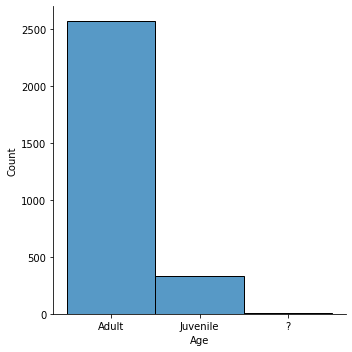

In [38]:
sns.displot(df['Age'])

In [39]:
df_sq_percent_age = df['Age'].value_counts()

# Frequência no dataframe dos esquilos conforme suas faixas etárias em ordem decrescente

In [40]:
df_sq_percent_age

Adult       2568
Juvenile     330
?              4
Name: Age, dtype: int64

# Porcentagem da frequência de esquilos conforme suas faixas etárias

In [41]:
(df_sq_percent_age/(df_sq_percent_age).sum())*100

Adult       88.490696
Juvenile    11.371468
?            0.137836
Name: Age, dtype: float64

# Frequência de aparições dos esquilos no dia

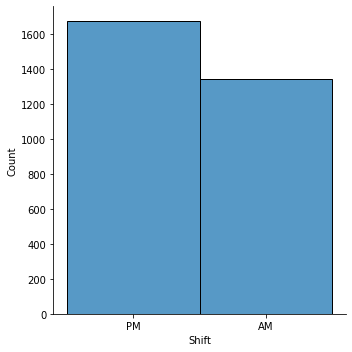

In [42]:
sns.displot(df['Shift'])


# Informações dos tipos das colunas do dataframe

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   X                                           3023 non-null   float64       
 1   Y                                           3023 non-null   float64       
 2   Unique Squirrel ID                          3023 non-null   object        
 3   Hectare                                     3023 non-null   object        
 4   Shift                                       3023 non-null   object        
 5   Date                                        3023 non-null   int64         
 6   Hectare Squirrel Number                     3023 non-null   int64         
 7   Age                                         2902 non-null   object        
 8   Primary Fur Color                           2968 non-null   object        
 9   Highligh

# Total de aparições de esquilos por hectares conforme as cores

In [44]:
tips = df.groupby('Primary Fur Color')['Hectare Squirrel Number'].sum()

In [45]:
tips

Primary Fur Color
Black         413
Cinnamon     1800
Gray        10031
Name: Hectare Squirrel Number, dtype: int64

# Dataframe filtrando apenas para esquilos de cor cinza

In [46]:
df[df['Primary Fur Color'] == 'Gray']

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,New Date
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),2018-10-06
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,False,False,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),2018-10-18
5,-73.956570,40.790256,33H-AM-1019-02,33H,AM,10192018,2,Juvenile,Gray,Cinnamon,...,False,False,False,False,False,False,False,NaN,POINT (-73.9565700386162 40.7902561000937),2018-10-19
6,-73.971974,40.769305,6G-PM-1020-02,06G,PM,10202018,2,Adult,Gray,NaN,...,False,False,False,False,False,True,False,NaN,POINT (-73.9719735582476 40.7693045133578),2018-10-20
7,-73.960261,40.794288,35C-PM-1013-03,35C,PM,10132018,3,NaN,Gray,Cinnamon,...,False,False,False,False,False,False,True,NaN,POINT (-73.9602609920814 40.79428830455661),2018-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,-73.966290,40.784330,23C-AM-1019-01,23C,AM,10192018,1,Adult,Gray,"Cinnamon, White",...,False,False,False,False,False,True,False,NaN,POINT (-73.9662895079734 40.7843300758044),2018-10-19
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466),2018-10-07
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973),2018-10-13
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883),2018-10-12


# Frequência das cores no dataframe

In [47]:
len(df[df['Primary Fur Color'] == 'Gray'])

2473

In [48]:
len(df[df['Primary Fur Color'] == 'Cinnamon'])

392

In [49]:
len(df[df['Primary Fur Color'] == 'Black'])

103